Dataset Loaded Successfully!
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

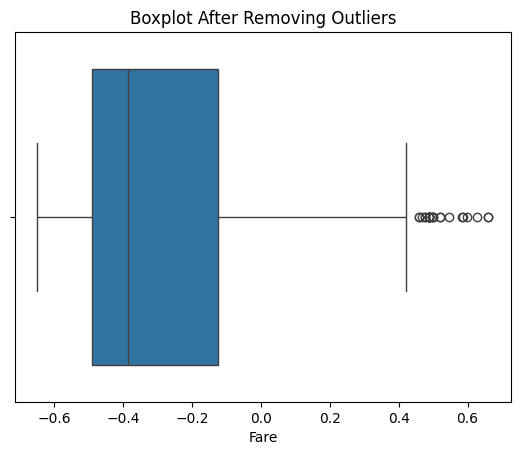

Cleaned dataset saved successfully!


In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 2: Load dataset
df = pd.read_csv("titanic.csv")  # replace with your dataset path
print("Dataset Loaded Successfully!")
print(df.head())
print(df.info())

# Step 3: Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.dropna(thresh=5, inplace=True)  # drops rows with too many NaN values

# Step 4: Encode categorical features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male=1, Female=0
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Step 5: Feature scaling (standardization)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Step 6: Outlier detection & removal (using IQR)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))]

# Step 7: Visualization (optional)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot After Removing Outliers")
plt.show()

# Step 8: Save cleaned dataset
df.to_csv("titanic_cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")
